# Принятие решений в бизнесе

## Цель

Приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты для увеличения выручки.


## Задачи

Проанализировать A/B-тест:
* Построить график кумулятивной выручки по группам. Сделайте выводы и предположения.
* Пострить график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
* Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
* Построить график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
* Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
* Построить точечный график количества заказов по пользователям. Сделайте выводы и предположения.
* Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
* Построить точечный график стоимостей заказов. Сделайте выводы и предположения.
* Посчитать 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
* Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
* Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
* Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
* Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
* Принять решение по результатам теста и объясните его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

## Описание данных

  Файл /datasets/hypothesis.csv.
* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

  Файл /datasets/orders.csv.
* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

  Файл /datasets/visitors.csv.
* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

In [ ]:
# импортируем библиотеки
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
import scipy.stats as stats

In [ ]:
# считываем данные
hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

## Предобработка данных

In [ ]:
#для корректного отображения столбцов
pd.set_option('display.max_colwidth', 200)

In [ ]:
hypothesis.info()
hypothesis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [ ]:
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [ ]:
visitors.info()
visitors.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Пропусков как таковых нет, приведём названия к единому стилю и изменим тип данных там, где это требуется. Проверим на наличие дубликатов, если они есть удалим их.

In [ ]:
#приводим к единому стилю
hypothesis.columns = hypothesis.columns.str.lower()
orders.columns = [name.replace('Id', '_id') for name in orders.columns]
display(hypothesis.columns)
orders.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

In [ ]:
#меняем тип данных
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

In [ ]:
#проверим на наличие дубликатов
display(hypothesis.duplicated().sum())
display(orders.duplicated().sum())
display(visitors.duplicated().sum())

0

0

0

## Приоритизация гипотез

### ICE

In [ ]:
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Наиболее перспективные гипотезы по ICE - 8, 0, 7, 6 и 2.

### RICE

In [ ]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Наиболее перспективные гипотезы по RICE - 7, 2, 0, 6 и 8.

Как мы видим перспективные гипотезы и по методу ICE и RICE одни и те же, но имеют немного разный приоритет. Это произошло потому что при расчёте RICE мы учитывали параметр reach, который учитывает охват пользователей, а при расчёте ICE мы во внимание этот параметр не брали.

## Анализ A/B-теста

Проверим на пересечение группы А и В. Возможно есть пользователи, которые попали в обе группы, пересечение будет влять на результаты.

In [ ]:
visitors_a = set(orders[orders["group"] == "A"]["visitor_id"].unique())
visitors_b = set(orders[orders["group"] == "B"]["visitor_id"].unique())
visitors_ab = visitors_a.intersection(visitors_b)
print(f'Количество пользователей в группе А = {len(visitors_a)}')
print(f'Количество пользователей в группе B = {len(visitors_b)}')
print(f'Количество пересекающихся пользователей между группами А и В = {len(visitors_ab)}')

Количество пользователей в группе А = 503
Количество пользователей в группе B = 586
Количество пересекающихся пользователей между группами А и В = 58


Исключим пользователей, которые попали в обе группы, т.к. они будут влиять на результаты.

In [ ]:
orders = orders[~orders["visitor_id"].isin(visitors_ab)]

In [ ]:
visitors_a = set(orders[orders["group"] == "A"]["visitor_id"].unique())
visitors_b = set(orders[orders["group"] == "B"]["visitor_id"].unique())
visitors_ab = visitors_a.intersection(visitors_b)
print(f'Количество пользователей в группе А = {len(visitors_a)}')
print(f'Количество пользователей в группе B = {len(visitors_b)}')
print(f'Количество пересекающихся пользователей между группами А и В = {len(visitors_ab)}')

Количество пользователей в группе А = 445
Количество пользователей в группе B = 528
Количество пересекающихся пользователей между группами А и В = 0


Теперь пересекающихся пользователей нет, но группы всё равно не сбалансированы, т.к. мы не можем повлиять на результы сбора данных, то работаем с тем что есть.

Нужно собрать кумулятивные данные. Объявим датафрейм cumulativeData со столбцами:
* date — дата;
* group — группа A/B-теста (A или B);
* orders — кумулятивное количество заказов на указанную дату в указанной группе;
* buyers — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;
* revenue — кумулятивная выручка на указанную дату в указанной группе (средний чек);
* visitors — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.

Создадим массив уникальных пар значений дат и групп теста методом drop_duplicates():

In [ ]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

Соберём агрегированные кумулятивные по дням данные о заказах.

In [ ]:
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

ordersAggregated.head()

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854


Соберём агрегированные кумулятивные по дням данные о посетителях интернет-магазина.

In [ ]:
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'visitors': 'sum'
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated.head(6)

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
383,2019-08-03,B,1803


Объединим обе таблицы в одну с понятными названиями столбцов:

In [ ]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


### график кумулятивной выручки по группам

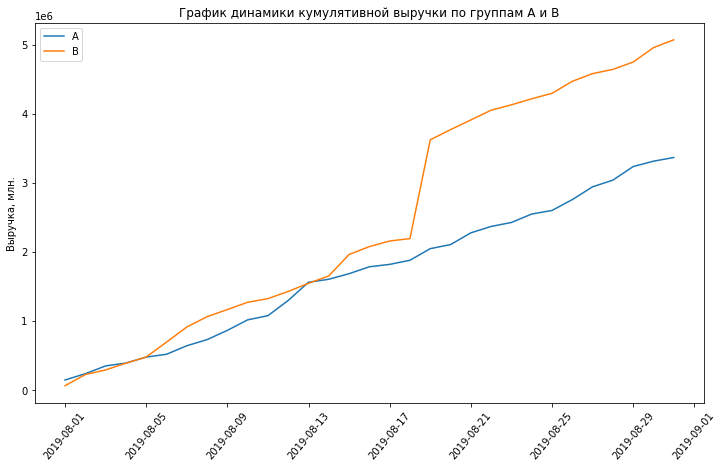

In [ ]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(12, 7))
# строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('График динамики кумулятивной выручки по группам А и В')
plt.ylabel("Выручка, млн.")
plt.xticks(rotation=50)
plt.legend()
plt.show()

Выручка равномерно увеличивается в течении всего теста. Кумулятивная выручка группы А меньше, чем у группы В. Заметен резкий скачок - это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

### график кумулятивного среднего чека по группам

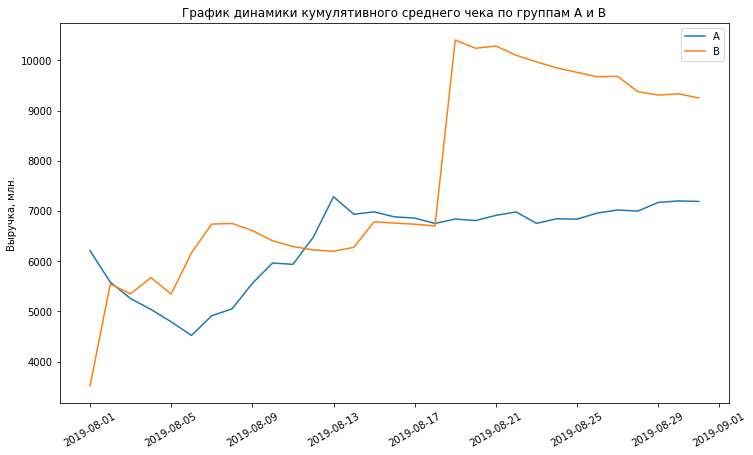

In [ ]:
plt.figure(figsize=(12, 7))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.title('График динамики кумулятивного среднего чека по группам А и В')
plt.ylabel("Выручка, млн.")
plt.xticks(rotation=30)
plt.legend()
plt.show()

Средний чек группы A был неравномерен, но после очередного скачка стабилизировался и во второй половине стал стабильнее. Средний чек же группы B показал резкий скачок, что говорит в пользу версии о дорогих заказов в выборке.


### график относительного изменения кумулятивного среднего чека группы B к группе A

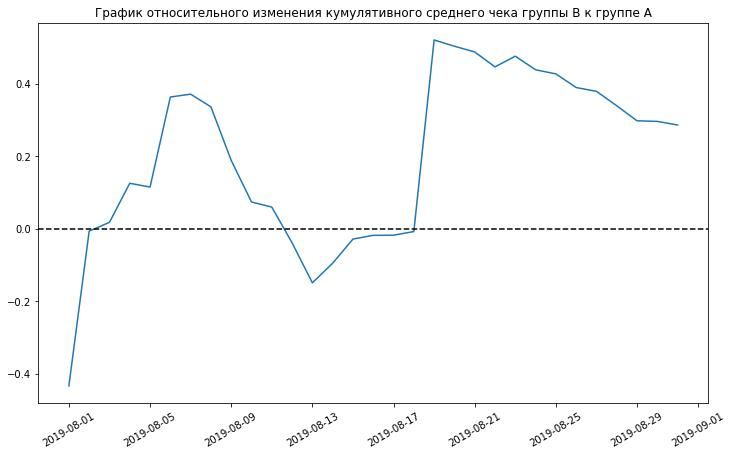

In [ ]:
plt.figure(figsize=(12, 7))

# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xticks(rotation=30)
plt.show()

График резко скачет в нескольких точках - можем точно сказать, что есть какие-то выбросы и крупные заказы.

### график кумулятивного среднего количества заказов на посетителя по группам

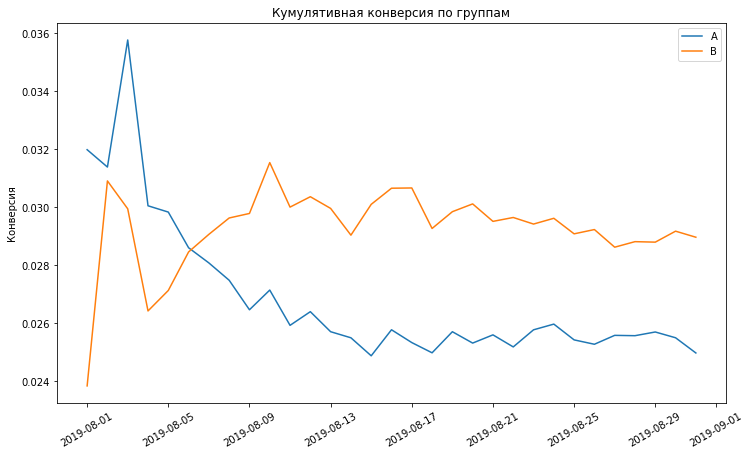

In [ ]:
#добавим столбец с конверсией
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']

# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(12, 7))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('Кумулятивная конверсия по группам')
plt.xlabel(' ')
plt.ylabel('Конверсия')
plt.xticks(rotation=30)
plt.show()


В начале каждая группа колебалась, потом они более менее выравнялись. Конверсия группы B зафиксировалась выше, конверсия группы A ниже.

### график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

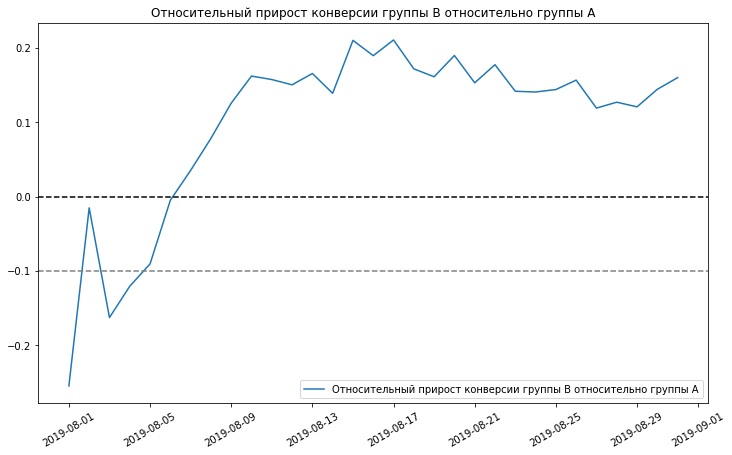

In [ ]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(12, 7))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.title('Относительный прирост конверсии группы B относительно группы A')
plt.xticks(rotation=30)
plt.show()

В начале теста группа В проигрывала группе А, но затем вырвалась вперед. Ее конверсия стремительно росла, потом снова падала и в самом конце снова пошла на рост.

### количество заказов по пользователям

Посчитаем количество заказов по пользователям.

In [ ]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
ordersByUsers.columns =  ['visitor_id', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,visitor_id,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


Есть пользователи, которые совершали 8, 9 и 11 заказов, что в разы больше обычного количества заказов для пользователя.

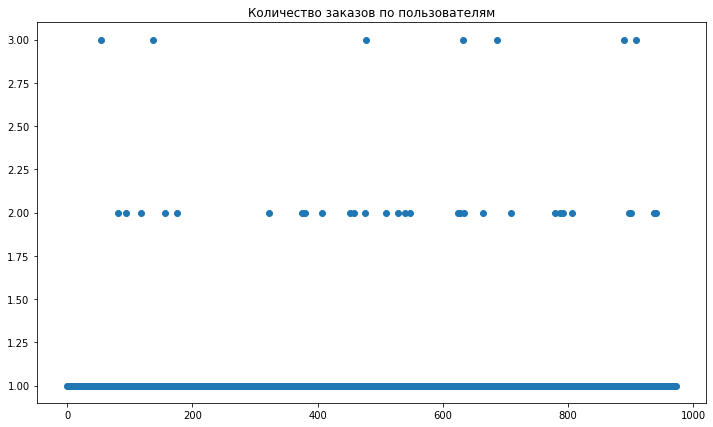

In [ ]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(12, 7))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Количество заказов по пользователям')
plt.show()

Много пользователей с 2-3 заказами. Их точная доля не ясна — пока не ясно считать их аномалиями или нет.

Посчитаем выборочные перцентили количества заказов на одного пользователя:

In [ ]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

Не более 5% пользователей совершали больше 2-х покупок в течение тестирования. И только 1% - два и более.
Примем за верхнюю границу 2 заказа на одного пользователя.

### стоимость заказов

In [ ]:
orders['revenue'].sort_values(ascending=False).head(10)

425     1294500
1196     202740
1136      92550
744       86620
743       67990
1103      66350
1099      65710
949       60450
940       58550
131       53904
Name: revenue, dtype: int64

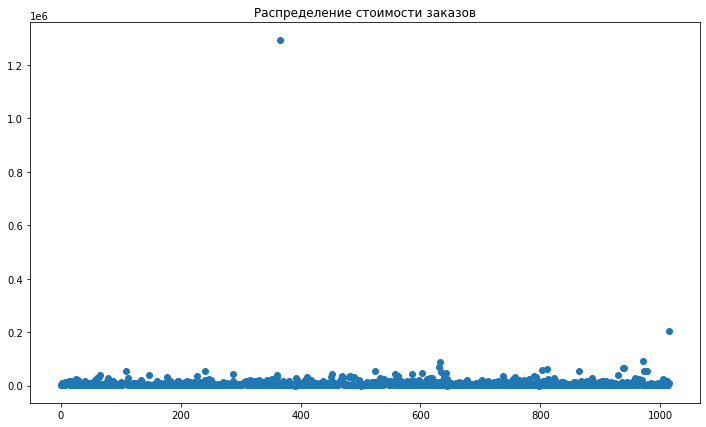

In [ ]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(12, 7))
plt.scatter(x_values, orders['revenue'])
plt.title('Распределение стоимости заказов')
plt.show()

На графике как минимум два крупных заказа, которые могут вызывать скачки на графиках кумулятивных метрик.

Посмотрим на график без этих выбросов.

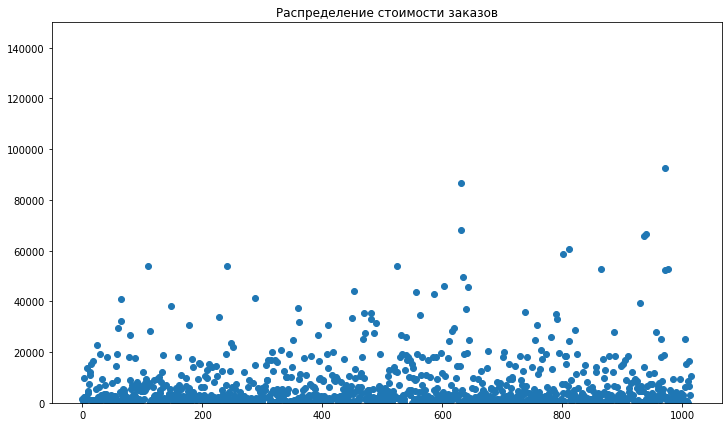

In [ ]:
plt.figure(figsize=(12, 7))
plt.ylim(0, 150000)
plt.scatter(x_values, orders['revenue'])
plt.title('Распределение стоимости заказов')
plt.show()

Основная масса заказов не превышает 20000.

Посчитаем выборочные перцентили стоимости заказов.

In [ ]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Выберем границу для определения аномальных заказов по значению 99% перцентиля - 53904.

### статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Посчитаем статистическую значимость различий в среднем числе заказов на пользователя и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.

Начнём с подготовки данных.

In [ ]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              23           142779              17   
1 2019-08-02              19            91602              23   
2 2019-08-03              24           112473              14   
3 2019-08-04              11            41176              14   
4 2019-08-05              22            86383              21   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0            59758                  23               142779   
1           162043                  42               234381   
2            67049                  66               346854   
3            96890                  77               388030   
4            89908                  99               474413   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  17                59758               719   
1                  40               221801               619   
2                  54               28

Получилась следующая таблица:
* date — дата;
* ordersPerDateA — количество заказов в выбранную дату в группе A;
* revenuePerDateA — суммарная выручка в выбранную дату в группе A;
* ordersPerDateB — количество заказов в выбранную дату в группе B;
* revenuePerDateB — суммарная выручка в выбранную дату в группе B;
* ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
* revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
* ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
* revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
* visitorsPerDateA — количество пользователей в выбранную дату в группе A;
* visitorsPerDateB — количество пользователей в выбранную дату в группе B;
* visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;
* visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.

Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [ ]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['user_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['user_id', 'orders']

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [ ]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

Зададим функцию для проверки гипотезы о равенстве групп А и В. Зададим уровень значимости alpha равный 0.05, применим критерий Манна-Уитни, выведем относительный прирост среднего числа заказов группы B: среднее число заказов группы B / среднее число заказов группы A - 1.

Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным — без удаления аномальных пользователей.

Введем основную и альтернативные гипотезы:

* Н0: различий в конверсии междугруппами нет
* Н1: различия в конверсии между группами есть



In [ ]:
def significance(dataA, dataB):
    alpha = 0.05
    p_value = stats.mannwhitneyu(dataA, dataB)[1]
    print("P-value: {0:.3f}".format(p_value))

    if (p_value < alpha):
        print("Отвергаем нулевую гипотезу: между группами есть различие")
    else:
        print("Не получилось отвергнуть нулевую гипотезу, между группами нет различий")

    print("Относительный прирост В к А: {0:.3%}".format(dataB.mean() / dataA.mean()-1))

In [ ]:
significance(sampleA, sampleB)

P-value: 0.011
Отвергаем нулевую гипотезу: между группами есть различие
Относительный прирост В к А: 15.980%


По "сырым" данным различия в конверсии между группами есть.
P-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. Относительный прирост группы B к А равен 13.81%.

### статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов.
Найдём относительные различия в среднем чеке между группами.

Введем основную и альтернативные гипотезы:
* H0: Различий в среднем чеке между группа нет
* H1: Различия в среднем чеке между группами есть

In [ ]:
significance(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])

P-value: 0.829
Не получилось отвергнуть нулевую гипотезу, между группами нет различий
Относительный прирост В к А: 28.660%


По "сырым" данным различия в среднем чеке заказа между группами нет. P-value = 0.365, значительно больше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем чеке заказа между группами есть, мы принимаем. Тем не менее относительный прирост группы B к А равен 25.871%, в данном случае наблюдаемое различие не является статистическим значимым.

### статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

За аномальных пользователей возьмем тех, кто совершил от 4 заказов или совершил заказ дороже 58233. Так как мы брали значения 99% перцентиля, то в общей сложности мы удалим 2% аномалий (при норме до 5%). Сделаем срезы пользователей с числом заказов больше 4 — usersWithManyOrders и пользователей, совершивших заказы дороже 58233 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers.
Узнаем, сколько всего аномальных пользователей атрибутом shape.

In [ ]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['user_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['user_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 53904]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
33      249864742
58      611059232
949     887908475
744     888512513
dtype: int64
16


Всего 16 аномальных пользователей.

Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Подготовим выборки количества заказов по пользователям по группам теста.

In [ ]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [ ]:
significance(sampleAFiltered, sampleBFiltered)

P-value: 0.007
Отвергаем нулевую гипотезу: между группами есть различие
Относительный прирост В к А: 18.921%


По результатам теста мы отвергаем нулевую гипотезу. Результаты по среднему количеству заказов практически не изменились. Относительный прирост конверсии группы В относительно группы А составил 18.921%.

### статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [ ]:
significance(
    orders[(orders['group']=='A') & np.logical_not(orders['visitor_id'].isin(abnormalUsers))]['revenue'],
    orders[(orders['group']=='B') & np.logical_not(orders['visitor_id'].isin(abnormalUsers))]['revenue'])

P-value: 0.788
Не получилось отвергнуть нулевую гипотезу, между группами нет различий
Относительный прирост В к А: -3.234%


P-value значительно больше 0.05. Причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. По разнице средних чеков групп различий практически нет.

## Вывод:

По результатам анализа было принято решение - остановить тест, зафиксировать победу одной из групп, а именно победу группы В.

* есть статистически значимое различие по конверсии между группами по «сырым» и «очищенным» данным после фильтрации аномалий. Конверсия группы В выше, чем в А, на 14-15%;

* нет статистически значимого различия по среднему чеку между группами по «сырым» и «очищенным» данным после фильтрации аномалий. При этом средний чек группы В выше (на "очищенных" данных - на 2%);

* график относительного изменения кумулятивной конверсии группы B к группе A показывает, что результаты группы В стабильны и превышают группу А.